<a href="https://colab.research.google.com/github/ROHIT-ONGIT/AI-powered-predictive-maintenance-system-using-machine-learning/blob/main/Failure_prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing neccesary packages

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from scipy.io import loadmat
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
from pickle import dump
from pickle import load

In [8]:
train = pd.read_csv('NB.csv')
train['Fault'] = 0

test = pd.read_csv('IR - 7.csv')
test['Fault'] = 1

dataset = pd.concat([train, test], ignore_index=True)
display(dataset)

,DE,FE,Fault
0,0.064254,0.038625,0
1,0.063002,0.096769,0
2,-0.004381,0.127382,0
3,-0.035882,0.144640,0
4,-0.023991,0.086702,0
...,...,...,...
242305,0.135958,-0.047255,1
242306,-0.083167,-0.070882,1
242307,0.391469,-0.181005,1
242308,0.185501,0.136011,1


Statical Analysis of dataset

In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242310 entries, 0 to 242309
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   DE      242310 non-null  float64
 1   FE      242310 non-null  float64
 2   Fault   242310 non-null  int64  
dtypes: float64(2), int64(1)
memory usage: 5.5 MB


In [10]:
dataset.describe()

,DE,FE,Fault
count,242310.000000,242310.000000,242310.000000
mean,0.008163,0.033348,0.500000
std,0.216483,0.170863,0.500001
min,-1.425531,-0.895782,0.000000
25%,-0.065505,-0.041913,0.000000
50%,0.011474,0.031435,0.500000
75%,0.080317,0.107658,1.000000
max,1.639620,0.957213,1.000000


Exploratory Data Analysis (EDA)

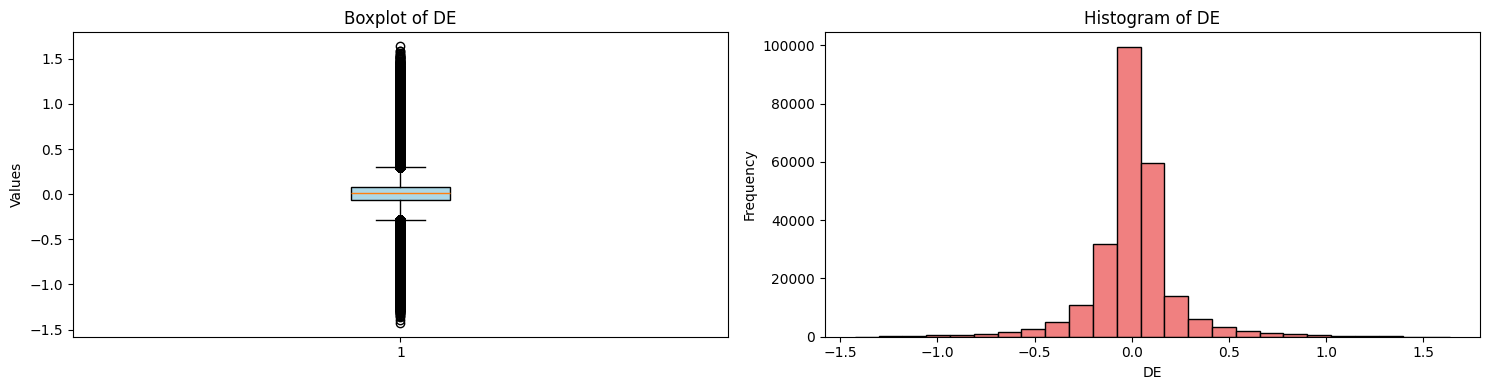

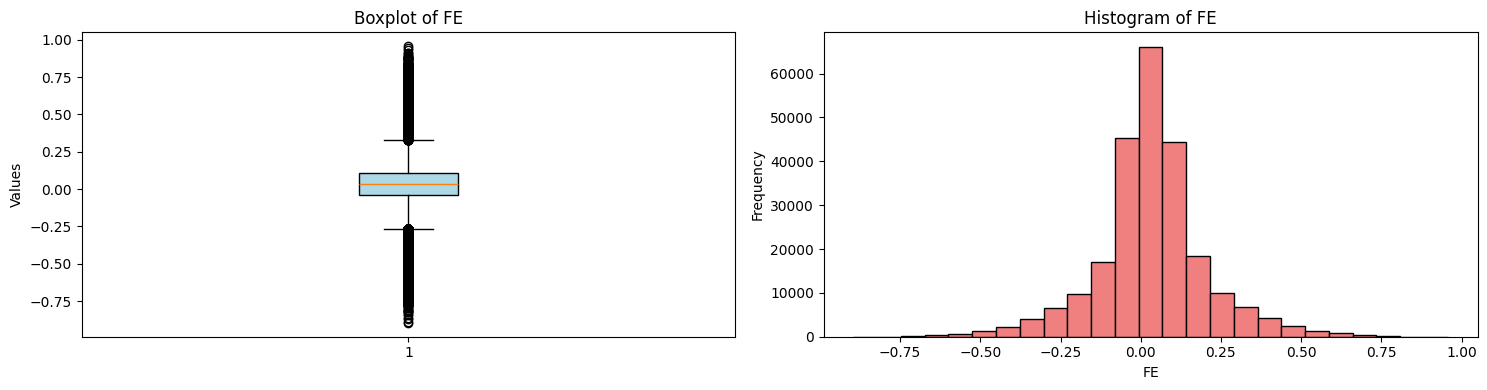

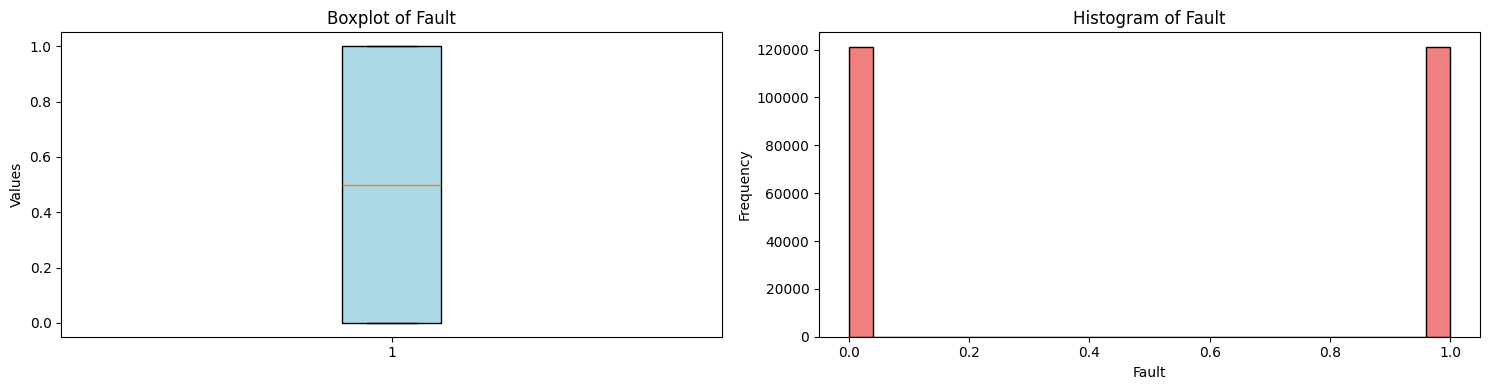

In [11]:
# Boxplot and Histogram for each feature in the dataset
for feature, values in dataset.items():
    fig, (box_ax, hist_ax) = plt.subplots(1, 2, figsize=(15, 4))

    # Boxplot
    box_ax.boxplot(values, patch_artist=True, boxprops=dict(facecolor='lightblue'))
    box_ax.set_title(f'Boxplot of {feature}', fontsize=12)
    box_ax.set_ylabel('Values')

    # Histogram
    hist_ax.hist(values, bins=25, color='lightcoral', edgecolor='black')
    hist_ax.set_title(f'Histogram of {feature}', fontsize=12)
    hist_ax.set_xlabel(feature)
    hist_ax.set_ylabel('Frequency')

    plt.tight_layout()
    plt.show()

In [12]:
# === Null and Duplicate Value Inspection ===
target_columns = ['DE', 'FE', 'Fault']

# Check for missing values
missing_count = dataset[target_columns].isnull().sum().sum()
print(f"Total missing (null) values in selected features: {missing_count}")

# Identify and remove duplicate entries
duplicate_count = dataset.duplicated().sum()
dataset.drop_duplicates(inplace=True)
dataset.reset_index(drop=True, inplace=True)
print(f"Total duplicate rows removed: {duplicate_count}")

# Updated number of rows after cleaning
total_samples = dataset.shape[0]
print(f"Final number of records: {total_samples}")

Total missing (null) values in selected features: 0
Total duplicate rows removed: 6941
Final number of records: 235369


In [13]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235369 entries, 0 to 235368
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   DE      235369 non-null  float64
 1   FE      235369 non-null  float64
 2   Fault   235369 non-null  int64  
dtypes: float64(2), int64(1)
memory usage: 5.4 MB


Correlation matrix and heatmap

In [14]:
dataset.corr()

,DE,FE,Fault
DE,1.000000,0.088877,-0.015778
FE,0.088877,1.000000,0.002574
Fault,-0.015778,0.002574,1.000000


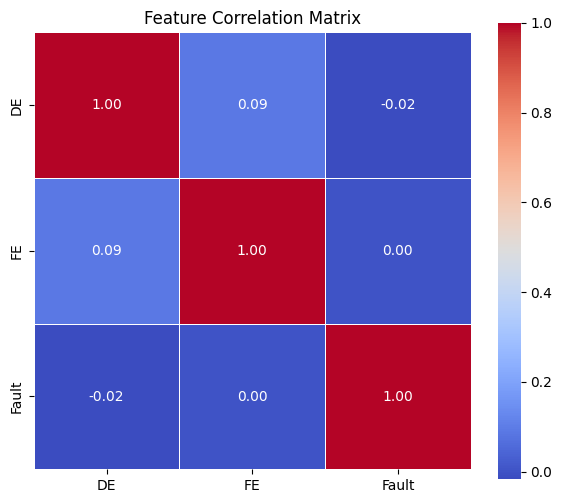

In [15]:
# === Correlation Heatmap ===
fig, heat_ax = plt.subplots(figsize=(6, 6))
correlation_matrix = dataset.corr()

sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',         # changed from 'YlGnBu'
    square=True,
    vmax=1.0,
    linewidths=0.5,
    cbar_kws={"shrink": 0.8}
)

heat_ax.set_title("Feature Correlation Matrix", fontsize=12)
plt.tight_layout()
plt.show()

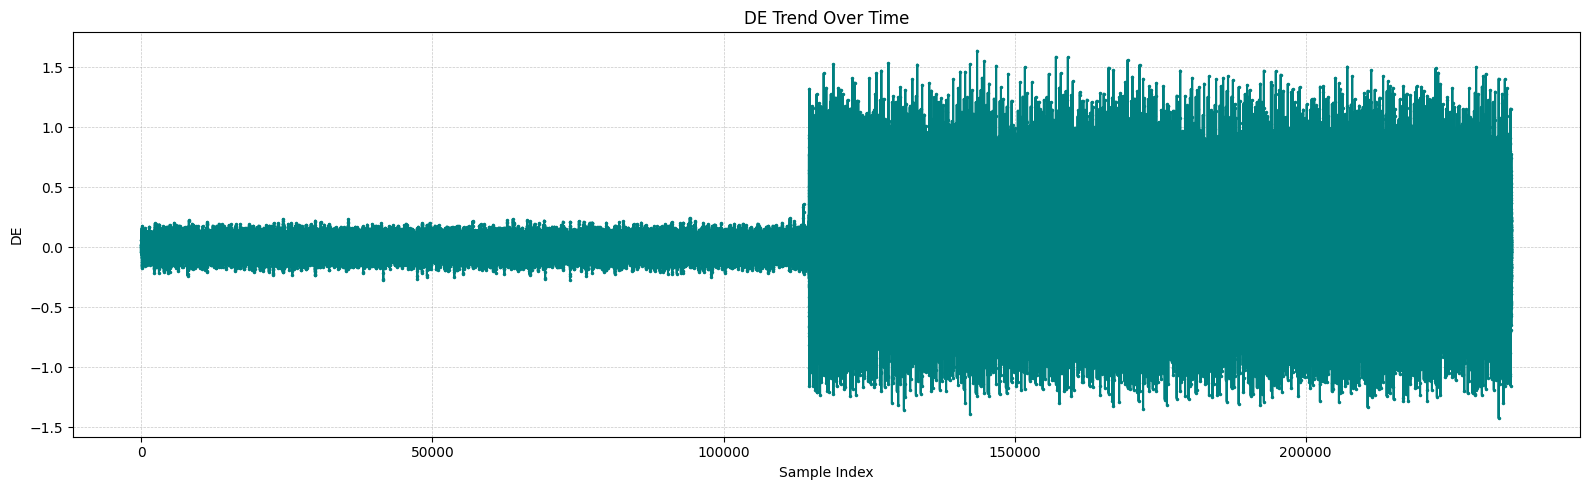

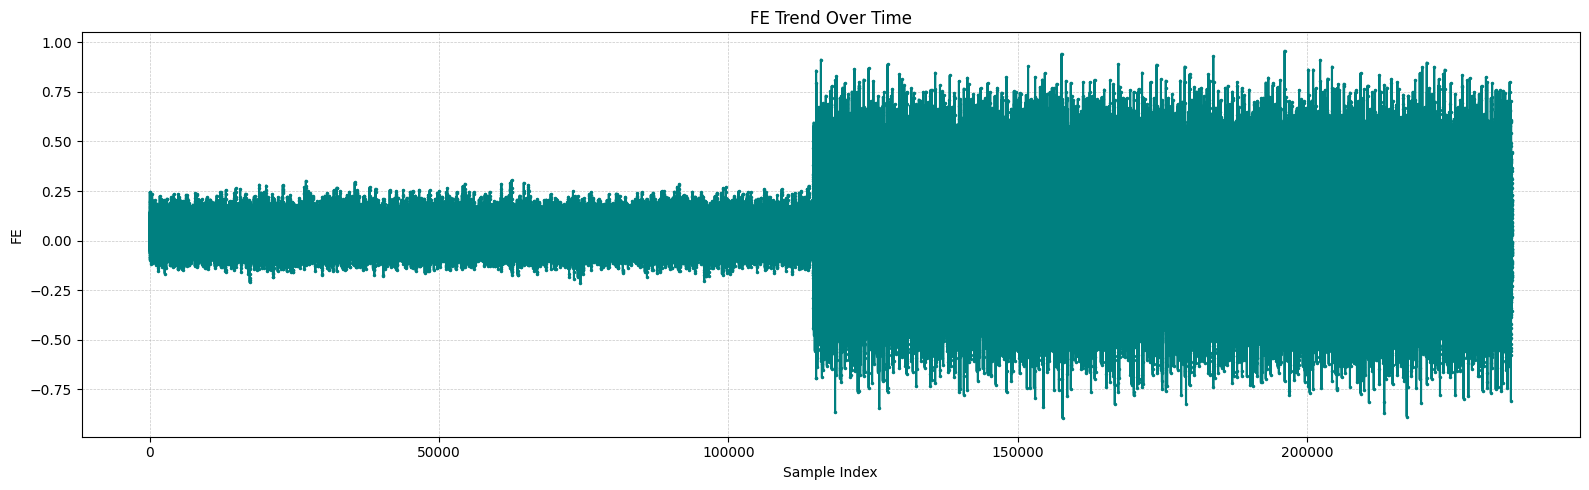

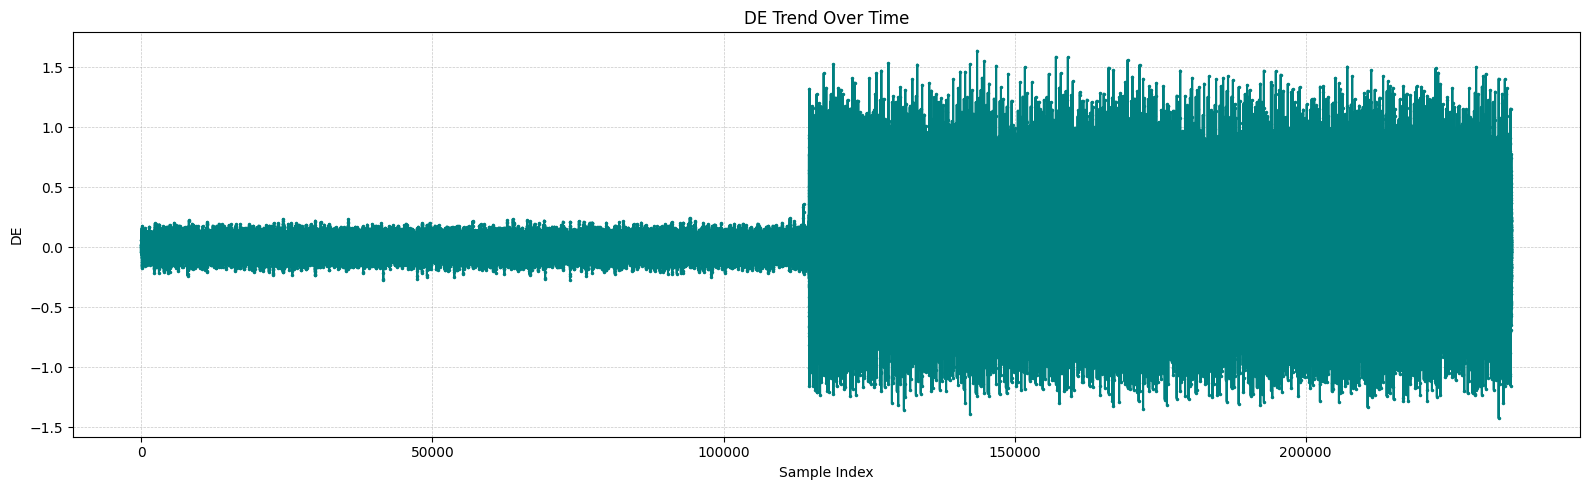

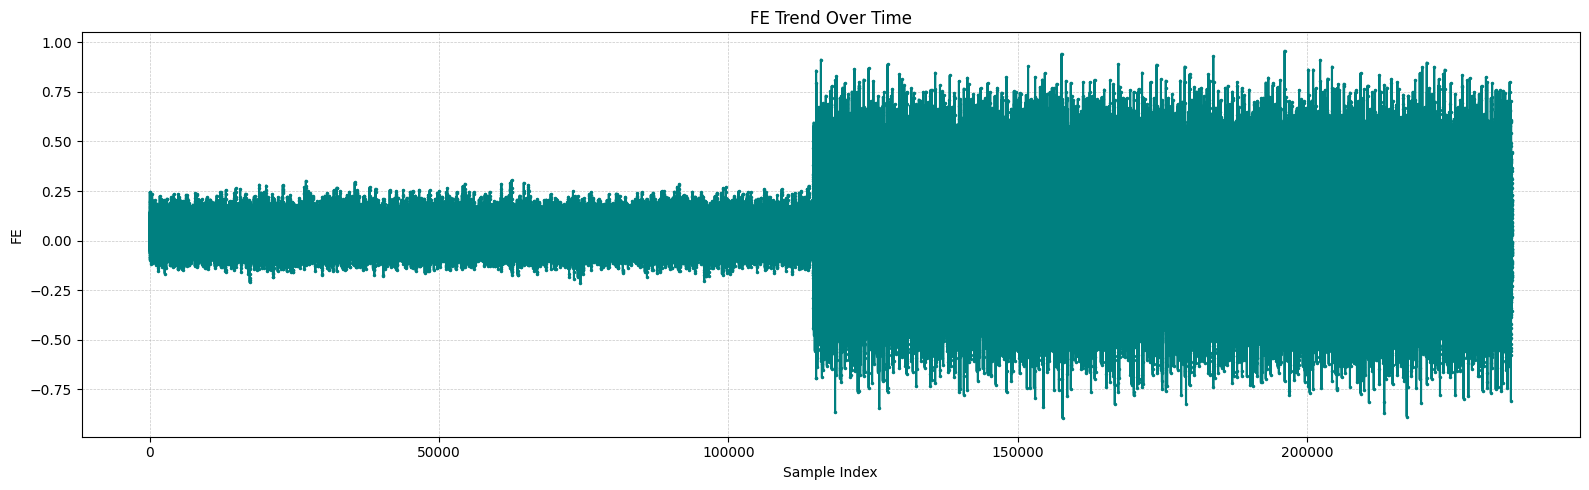

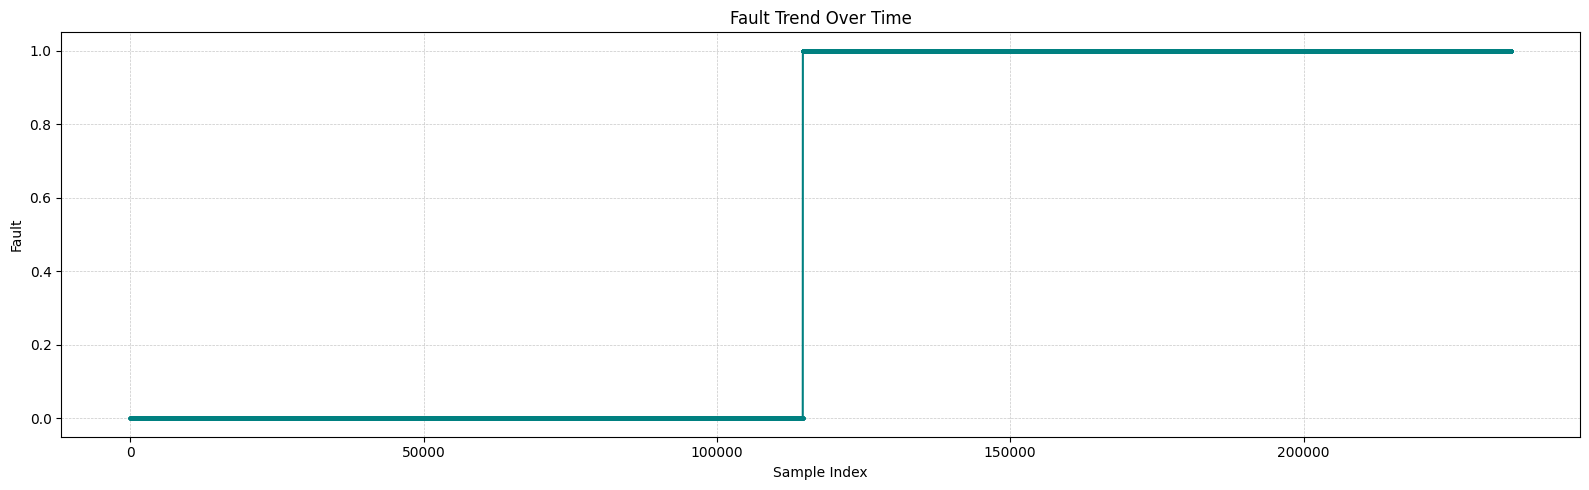

In [16]:
def plot_time_series(series, label_name):
    indices = list(range(len(series.index)))
    values = series

    # Create a line plot for the feature
    plt.figure(figsize=(16, 5))
    plt.plot(indices, values, color='teal', linestyle='-', marker='.', markersize=3)
    plt.xlabel('Sample Index')
    plt.ylabel(label_name)
    plt.title(f'{label_name} Trend Over Time')
    plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
    plt.tight_layout()
    plt.show()

# Call the function for 'DE' and 'FE' columns
plot_time_series(dataset['DE'], 'DE')
plot_time_series(dataset['FE'], 'FE')

for (columnName, columnData) in dataset.items():
    plot_time_series(columnData, columnName)

# Feature engineering

In [17]:
X = dataset.iloc[:, 0:2].values
y = dataset.iloc[:, 2]

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [19]:
# Save processed datasets to disk using pickle
from pickle import dump
import os

# Create the directory if it doesn't exist
os.makedirs("pickle/dataset/bearing-failure-prediction", exist_ok=True)

dump(X_train, open("pickle/dataset/bearing-failure-prediction/X_train.pkl", "wb"))
dump(y_train, open("pickle/dataset/bearing-failure-prediction/y_train.pkl", "wb"))
dump(X_test, open("pickle/dataset/bearing-failure-prediction/X_test.pkl", "wb"))
dump(y_test, open("pickle/dataset/bearing-failure-prediction/y_test.pkl", "wb"))

Scaling data

In [20]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Standard scaling
standard_scaler = StandardScaler()
X_train_std = standard_scaler.fit_transform(X_train)
X_test_std = standard_scaler.transform(X_test)

# Min-Max scaling
minmax_scaler = MinMaxScaler()
X_train_minmax = minmax_scaler.fit_transform(X_train)
X_test_minmax = minmax_scaler.transform(X_test)

# Assign Min-Max scaled data to variables
X_train_mm = X_train_minmax
X_test_mm = X_test_minmax

In [21]:


# Save Standard Scaled data
dump(X_train_std, open("pickle/dataset/bearing-failure-prediction/X_train_std.pkl", "wb"))
dump(X_test_std, open("pickle/dataset/bearing-failure-prediction/X_test_std.pkl", "wb"))

# Save Min-Max Scaled data
dump(X_train_minmax, open("pickle/dataset/bearing-failure-prediction/X_train_minmax.pkl", "wb"))
dump(X_test_minmax, open("pickle/dataset/bearing-failure-prediction/X_test_minmax.pkl", "wb"))


# Training the diffrent models

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

def train_models(X_train, y_train):
    models = {
        'Logistic Regression': LogisticRegression(random_state=0),
        'KNN': KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2),
        'SVM Linear': SVC(kernel='linear', random_state=0),
        'SVM RBF': SVC(kernel='rbf', random_state=0),
        'Naive Bayes': GaussianNB(),
        'Decision Tree': DecisionTreeClassifier(criterion='entropy', random_state=0),
        'Random Forest': RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
    }

    for name, model in models.items():
        model.fit(X_train, y_train)
        print(f'{name} Training Accuracy: {model.score(X_train, y_train):.4f}')

    return list(models.values())


In [23]:
trained_models = train_models(X_train, y_train)


Logistic Regression Training Accuracy: 0.4670
KNN Training Accuracy: 0.8840
SVM Linear Training Accuracy: 0.5134
SVM RBF Training Accuracy: 0.8637
Naive Bayes Training Accuracy: 0.8606
Decision Tree Training Accuracy: 1.0000
Random Forest Training Accuracy: 0.9837


In [24]:
import os
from pickle import dump

save_dir = 'pickle/models/bearing_classifiers/standard_scaled'
os.makedirs(save_dir, exist_ok=True)

for model in trained_models:
    model_name = model.__class__.__name__
    file_path = os.path.join(save_dir, f'{model_name}.pkl')
    dump(model, open(file_path, 'wb'))

Checking the accuracy scores by diffrent

In [25]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

def print_scores(y_true, y_pred, model_name="Model"):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, zero_division=0)
    rec = recall_score(y_true, y_pred, zero_division=0)
    f1 = f1_score(y_true, y_pred, zero_division=0)

    print(f"[{model_name}] Accuracy: {acc:.2%}, Precision: {prec:.2%}, Recall: {rec:.2%}, F1 Score: {f1:.2%}")


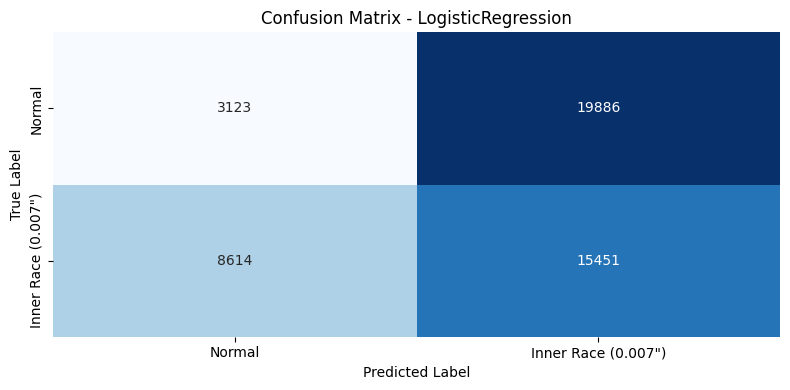

[LogisticRegression] Accuracy: 39.46%, Precision: 43.72%, Recall: 64.21%, F1 Score: 52.02%


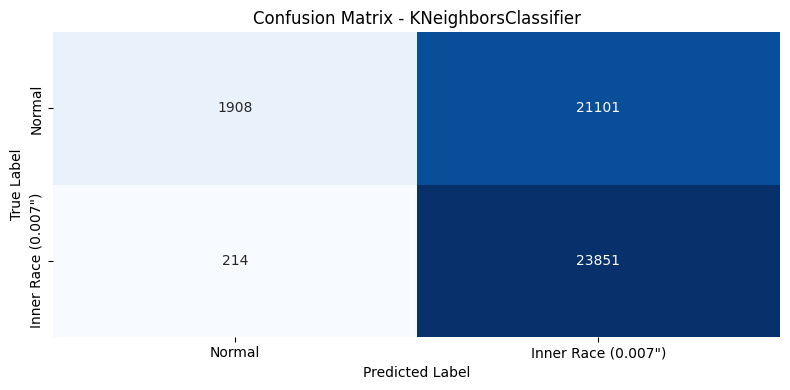

[KNeighborsClassifier] Accuracy: 54.72%, Precision: 53.06%, Recall: 99.11%, F1 Score: 69.12%


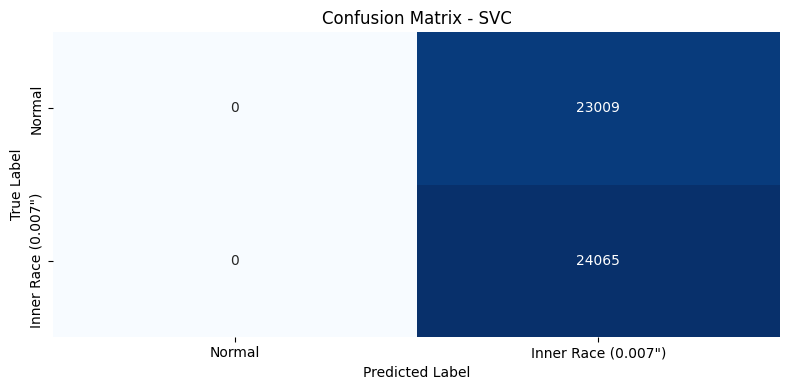

[SVC] Accuracy: 51.12%, Precision: 51.12%, Recall: 100.00%, F1 Score: 67.66%


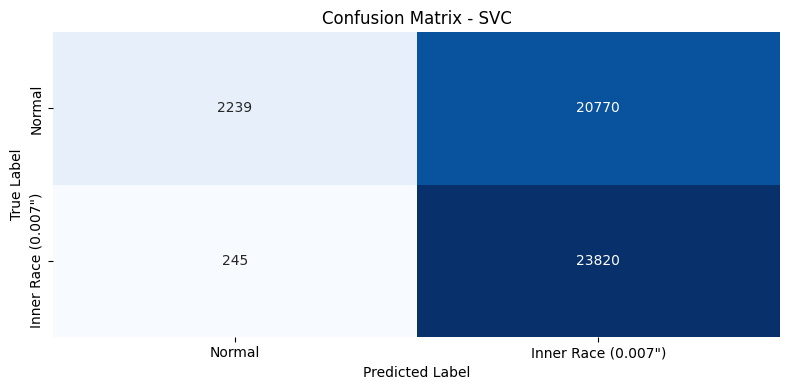

[SVC] Accuracy: 55.36%, Precision: 53.42%, Recall: 98.98%, F1 Score: 69.39%


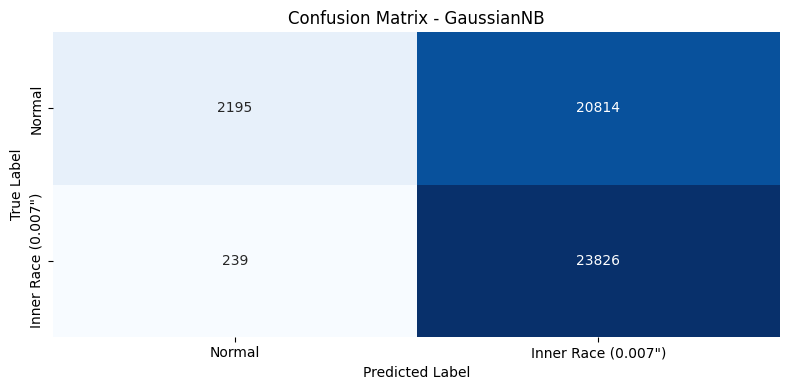

[GaussianNB] Accuracy: 55.28%, Precision: 53.37%, Recall: 99.01%, F1 Score: 69.36%


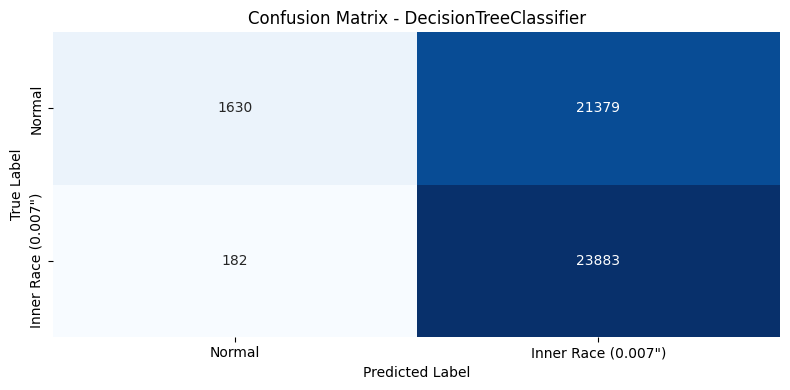

[DecisionTreeClassifier] Accuracy: 54.20%, Precision: 52.77%, Recall: 99.24%, F1 Score: 68.90%


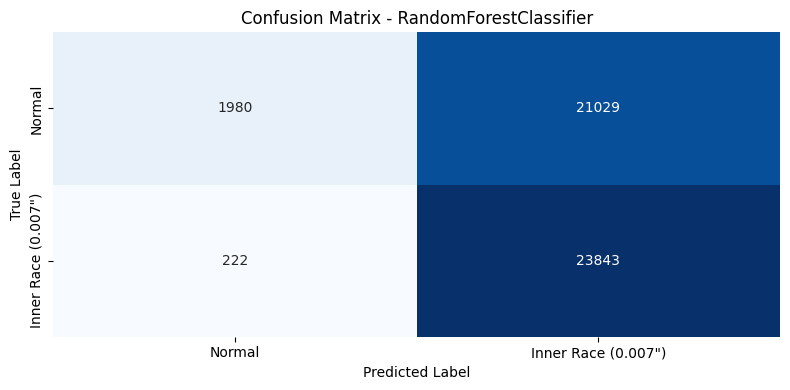

[RandomForestClassifier] Accuracy: 54.86%, Precision: 53.14%, Recall: 99.08%, F1 Score: 69.17%


In [26]:
from sklearn.metrics import confusion_matrix
labels = ['Normal', 'Inner Race (0.007")']

for model in trained_models:
    y_pred = model.predict(X_test_std)

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    cm_df = pd.DataFrame(cm, index=labels, columns=labels)

    plt.figure(figsize=(8, 4))
    sns.heatmap(cm_df, annot=True, fmt='g', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix - {model.__class__.__name__}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.tight_layout()
    plt.show()

    # Scores
    print_scores(y_test, y_pred, model.__class__.__name__)

Logistic Regression Training Accuracy: 0.4681
KNN Training Accuracy: 0.8843
SVM Linear Training Accuracy: 0.5134
SVM RBF Training Accuracy: 0.8625
Naive Bayes Training Accuracy: 0.8606
Decision Tree Training Accuracy: 1.0000
Random Forest Training Accuracy: 0.9836


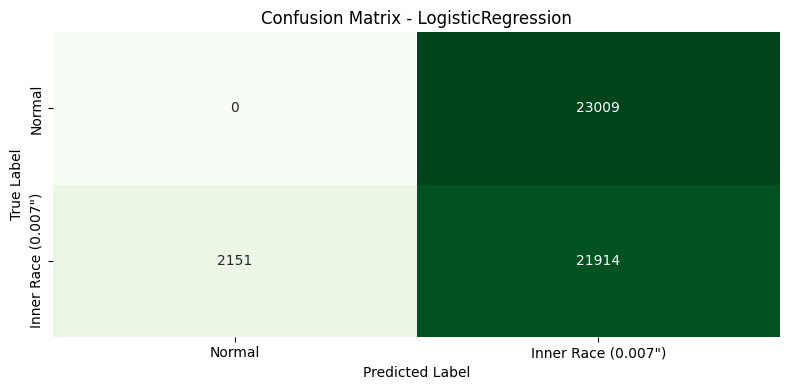

[LogisticRegression] Accuracy: 46.55%, Precision: 48.78%, Recall: 91.06%, F1 Score: 63.53%


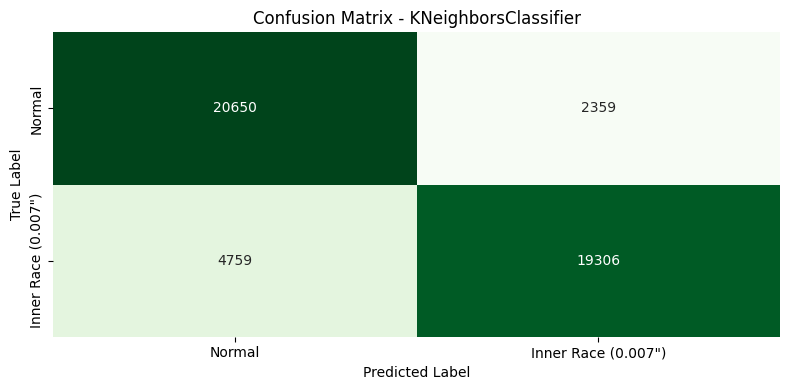

[KNeighborsClassifier] Accuracy: 84.88%, Precision: 89.11%, Recall: 80.22%, F1 Score: 84.43%


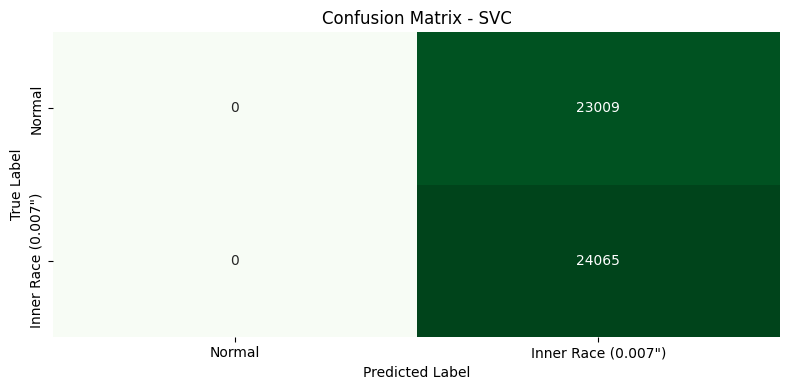

[SVC] Accuracy: 51.12%, Precision: 51.12%, Recall: 100.00%, F1 Score: 67.66%


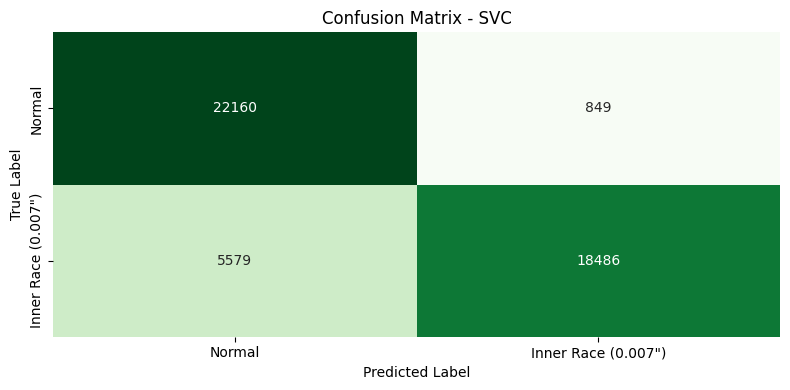

[SVC] Accuracy: 86.34%, Precision: 95.61%, Recall: 76.82%, F1 Score: 85.19%


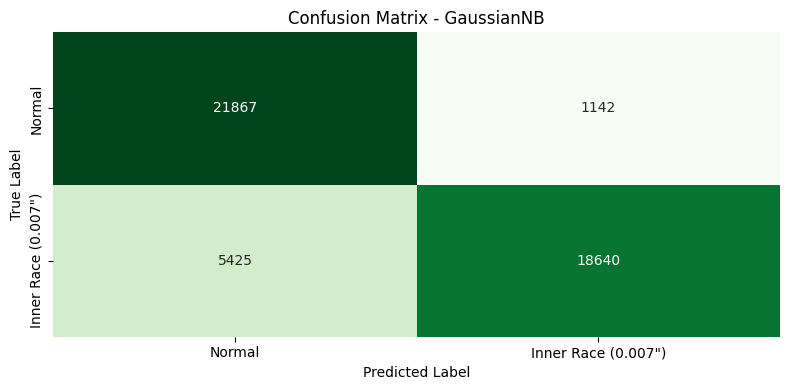

[GaussianNB] Accuracy: 86.05%, Precision: 94.23%, Recall: 77.46%, F1 Score: 85.02%


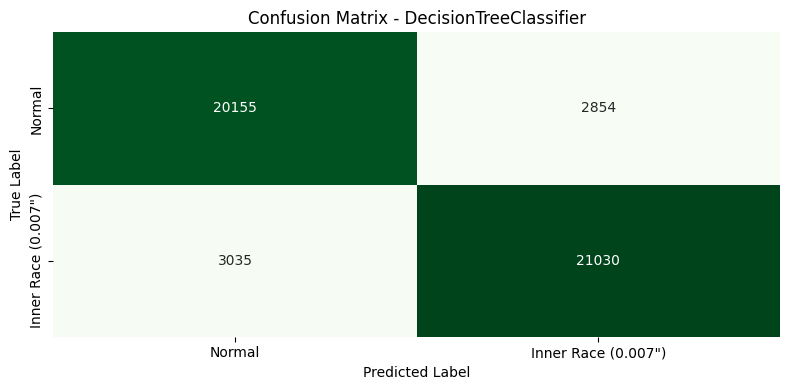

[DecisionTreeClassifier] Accuracy: 87.49%, Precision: 88.05%, Recall: 87.39%, F1 Score: 87.72%


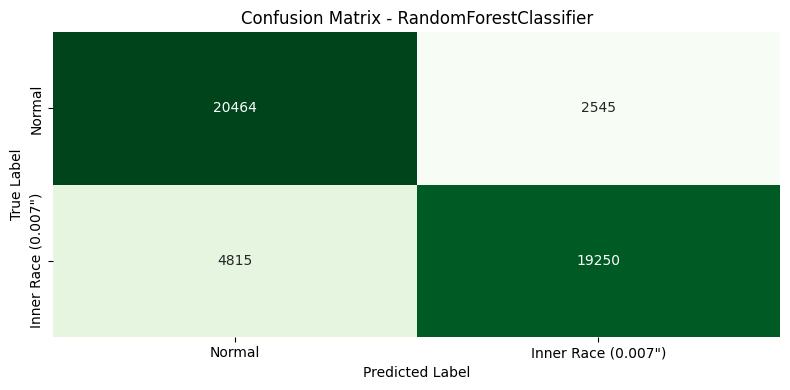

[RandomForestClassifier] Accuracy: 84.37%, Precision: 88.32%, Recall: 79.99%, F1 Score: 83.95%


In [27]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

def print_scores(y_true, y_pred, model_name="Model"):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, zero_division=0)
    rec = recall_score(y_true, y_pred, zero_division=0)
    f1 = f1_score(y_true, y_pred, zero_division=0)

    print(f"[{model_name}] Accuracy: {acc:.2%}, Precision: {prec:.2%}, Recall: {rec:.2%}, F1 Score: {f1:.2%}")

# Train models using Min-Max Scaled data
models_mm = train_models(X_train_mm, y_train)

# Evaluate models
labels = ['Normal', 'Inner Race (0.007")']

for model in models_mm:
    y_pred = model.predict(X_test_mm)

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    cm_df = pd.DataFrame(cm, index=labels, columns=labels)

    plt.figure(figsize=(8, 4))
    sns.heatmap(cm_df, annot=True, fmt='g', cmap='Greens', cbar=False)
    plt.title(f'Confusion Matrix - {model.__class__.__name__}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.tight_layout()
    plt.show()

    # Print scores
    print_scores(y_test, y_pred, model.__class__.__name__)

In [31]:
from pickle import dump
dump(exported_pipeline, open("rul_model.pkl", "wb"))

NameError: name 'exported_pipeline' is not defined

In [ ]:
# Example: Saving the first trained model (Logistic Regression)
# Replace trained_models[0] with the variable you want to save

# Make sure the directory exists
import os
os.makedirs("pickle/models/bearing_classifiers/standard_scaled", exist_ok=True)

# Assuming you want to save one of the trained models from the 'trained_models' list
# For example, saving the first model (Logistic Regression)
if trained_models:
    first_model = trained_models[0]
    model_name = first_model.__class__.__name__
    file_path = os.path.join("pickle/models/bearing_classifiers/standard_scaled", f'{model_name}.pkl')
    dump(first_model, open(file_path, 'wb'))
    print(f"Saved {model_name} to {file_path}")
else:
    print("No trained models found to save.")

In [30]:
from pickle import load
import os

# Load the saved model
save_dir = 'pickle/models/bearing_classifiers/standard_scaled'
model_name = 'LogisticRegression'

file_path = os.path.join(save_dir, f'{model_name}.pkl')

try:
    loaded_model = load(open(file_path, 'rb'))
    print(f"Successfully loaded {model_name} model from {file_path}")

    # Example of making predictions with the loaded model
    predictions = loaded_model.predict(X_test_std)

    # Print some example predictions
    print("\nExample predictions:")
    print(predictions[:10])

except FileNotFoundError:
    print(f"Error: The file {file_path} was not found.")
except Exception as e:
    print(f"An error occurred while loading the model: {e}")

Successfully loaded LogisticRegression model from pickle/models/bearing_classifiers/standard_scaled/LogisticRegression.pkl

Example predictions:
[1 1 0 0 1 1 1 1 0 1]


The error `NameError: name 'exported_pipeline' is not defined` means that the variable `exported_pipeline` was used in the code before it was assigned a value.

Looking at the notebook, you trained several models in the cell with id `d0PrL0gbjVXH`. It seems likely you intended to save one of those trained models instead of a variable named `exported_pipeline`.

The following cell saves the `RandomForestClassifier` model, as an example, using the same pattern as the cell with id `kaz8aGF75NGw`. You can modify this to save any of the other trained models if you prefer.

In [29]:
from pickle import dump
import os

# Make sure the directory exists
save_dir = 'pickle/models/bearing_classifiers/standard_scaled'
os.makedirs(save_dir, exist_ok=True)


if trained_models:
    model_to_save = trained_models[-1] # Get the last model in the list (RandomForestClassifier)
    model_name = model_to_save.__class__.__name__
    file_path = os.path.join(save_dir, f'{model_name}.pkl')
    dump(model_to_save, open(file_path, 'wb'))
    print(f"Saved {model_name} to {file_path}")
else:
    print("No trained models found to save.")

Saved RandomForestClassifier to pickle/models/bearing_classifiers/standard_scaled/RandomForestClassifier.pkl
